<h1>ML in Art - Team 7 </h1>

*Advance Programming For Business Analytics*

## File #3: Data PreProcessing and ML Modelling

### File Preview
1. Load and join the two datasets: paintings and artists
2. Clean the data and prepare it for ML modelling
3. Create a ML model and examine its performance

___

## Import & Load

    - Download libraries
    - View data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set()
%matplotlib inline

In [2]:
dfp = pd.read_csv("C:/Users/ninae/OneDrive/Documents/OIM7502/paintings_df_model.csv")
dfp

,index,length_in,width_in,artist,title,medium,auction,price,percent est,month sold,year sold,century
0,0,10.236220,12.204724,correggio,Madonna and Child,Oil On Canvas,Bonhams,334,58,Jun,18,Other
1,1,21.259843,24.803150,correggio,Jeune femme nue dans un paysage,Oil On Canvas,Stockholms Auktionsverk,7502,28,Jun,17,Other
2,2,15.748031,22.440945,correggio,Madone St Jérome,Oil On Walnut,MonsAntic.com,870,20,Oct,16,Other
3,3,40.010000,67.010000,correggio,Jupiter and Io,Oil On Canvas,Bernaerts,4333,27,Dec,15,Other
4,5,57.000000,67.010000,correggio,Madonna de Latte,Oil On Canvas,Nagel Auktionen,3140,33,Jun,13,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
10483,11344,76.200000,93.980000,jean-francois-de-troy,Roman charity,Oil On Canvas,Christie's,7109,80,Apr,0,Other
10484,11345,73.660000,91.440000,jean-francois-de-troy,Woman with peaches,Oil On Canvas,Koller Auktionen,5501,33,Mar,99,Other
10485,11346,76.200000,76.200000,jean-francois-de-troy,Courting couples on a terrace,Oil On Canvas,Christie's,5729,30,Jul,98,Other
10486,11348,127.000000,104.140000,jean-francois-de-troy,Neptune and Amphitrite,Oil On Canvas,Christie's,4200,68,Jun,98,Other


In [3]:
print(dfp.shape)
print(dfp.isnull().values.any())

(10488, 12)
False


In [4]:
dfa = pd.read_csv("C:/Users/ninae/OneDrive/Documents/OIM7502/artists_dfb.csv")
dfa

,artist,URL Artsy,URL Wiki,Nationality,Genre,Art Movement,Momentum Score,Trends 2017,Trends 2018,Trends 2019,Trends 2020,Trends 2021,Trends 2022,Articles,Followers,Yearly Lots Sold,birth_year,death_year,sell_through_rate
0,josef-albers,https://www.artsy.net/artist/josef-albers/auct...,https://www.wikiart.org/en/josef-albers,German,abstract,"Constructivism, Concrete Art (Concretism), Abs...",NaN,54.105263,58.192308,56.500000,49.346154,48.442308,45.333333,100,7920.284153,20.000000,1800s,1900s,92.500000
1,richard-anuszkiewicz,https://www.artsy.net/artist/richard-anuszkiew...,https://www.wikiart.org/en/richard-anuszkiewicz,American,abstract,Op Art,NaN,16.868421,14.096154,15.846154,15.288462,10.519231,11.333333,32,2500.000000,8.000000,1900s,Other,86.600000
2,milton-avery,https://www.artsy.net/artist/milton-avery/auct...,https://www.wikiart.org/en/milton-avery,American,abstract,"Post-Impressionism, Expressionism",NaN,21.236842,20.596154,18.769231,14.903846,15.557692,22.600000,89,3100.000000,19.000000,1800s,1900s,73.700000
3,jean-michel-basquiat,https://www.artsy.net/artist/jean-michel-basqu...,https://www.wikiart.org/en/jean-michel-basquiat,American,portrait,"Neo-Expressionism, Street art",NaN,13.263158,10.557692,8.653846,9.692308,10.634615,12.133333,98,205000.000000,18.000000,1900s,1900s,84.600000
4,thomas-hart-benton,https://www.artsy.net/artist/thomas-hart-bento...,https://www.wikiart.org/en/thomas-hart-benton,American,landscape,"Regionalism, Synchromism",NaN,42.052632,38.480769,39.788462,31.596154,27.692308,21.466667,94,1400.000000,2.000000,1800s,1900s,72.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,anders-zorn,https://www.artsy.net/artist/anders-zorn/aucti...,https://www.wikiart.org/en/anders-zorn,Swedish,flower painting,"Realism, Impressionism",NaN,43.973684,27.096154,23.980769,27.365385,28.096154,19.000000,27,420.000000,6.000000,1800s,1900s,90.900000
240,ferdinand-hodler,https://www.artsy.net/artist/ferdinand-hodler/...,https://www.wikiart.org/en/ferdinand-hodler,Swiss,landscape,"Symbolism, Art Nouveau",NaN,35.184211,37.903846,23.519231,23.384615,27.903846,20.333333,21,604.000000,7.650794,1800s,1900s,80.460317
241,paul-klee,https://www.artsy.net/artist/paul-klee/auction...,https://www.wikiart.org/en/paul-klee,German,abstract,"Expressionism, Abstract Art, Surrealism",NaN,6.842105,9.365385,7.576923,6.596154,5.769231,6.066667,99,12000.000000,31.000000,1800s,1900s,80.100000
242,joaquin-torres-garcia,https://www.artsy.net/artist/joaquin-torres-ga...,https://www.wikiart.org/en/joaquin-torres-garcia,Spanish,abstract,"Modernismo, Constructivism, Concrete Art (Conc...",NaN,10.868421,13.115385,11.615385,17.019231,12.230769,11.933333,40,992.000000,5.000000,1800s,1900s,69.500000


In [5]:
df = pd.merge(dfp, dfa, on='artist', how='inner')
df

,index,length_in,width_in,artist,title,medium,auction,price,percent est,month sold,...,Trends 2019,Trends 2020,Trends 2021,Trends 2022,Articles,Followers,Yearly Lots Sold,birth_year,death_year,sell_through_rate
0,0,10.236220,12.204724,correggio,Madonna and Child,Oil On Canvas,Bonhams,334,58,Jun,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
1,1,21.259843,24.803150,correggio,Jeune femme nue dans un paysage,Oil On Canvas,Stockholms Auktionsverk,7502,28,Jun,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
2,2,15.748031,22.440945,correggio,Madone St Jérome,Oil On Walnut,MonsAntic.com,870,20,Oct,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
3,3,40.010000,67.010000,correggio,Jupiter and Io,Oil On Canvas,Bernaerts,4333,27,Dec,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
4,5,57.000000,67.010000,correggio,Madonna de Latte,Oil On Canvas,Nagel Auktionen,3140,33,Jun,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,11344,76.200000,93.980000,jean-francois-de-troy,Roman charity,Oil On Canvas,Christie's,7109,80,Apr,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10484,11345,73.660000,91.440000,jean-francois-de-troy,Woman with peaches,Oil On Canvas,Koller Auktionen,5501,33,Mar,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10485,11346,76.200000,76.200000,jean-francois-de-troy,Courting couples on a terrace,Oil On Canvas,Christie's,5729,30,Jul,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10486,11348,127.000000,104.140000,jean-francois-de-troy,Neptune and Amphitrite,Oil On Canvas,Christie's,4200,68,Jun,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317


In [6]:
df.isna().sum()

index                    0
length_in                0
width_in                 0
artist                   0
title                    0
medium                   0
auction                  0
price                    0
percent est              0
month sold               0
year sold                0
century                  0
URL Artsy                0
URL Wiki                 0
Nationality              0
Genre                    0
Art Movement             0
Momentum Score       10488
Trends 2017              0
Trends 2018              0
Trends 2019              0
Trends 2020              0
Trends 2021              0
Trends 2022              0
Articles                 0
Followers                0
Yearly Lots Sold         0
birth_year               0
death_year               0
sell_through_rate        0
dtype: int64

# Data Cleaning

    - Drop unecessary columns
    - Dummify categorical variables

In [7]:
df = df.drop(columns=['title','index','Momentum Score','URL Artsy','URL Wiki'])
df.head()

,length_in,width_in,artist,medium,auction,price,percent est,month sold,year sold,century,...,Trends 2019,Trends 2020,Trends 2021,Trends 2022,Articles,Followers,Yearly Lots Sold,birth_year,death_year,sell_through_rate
0,10.236220,12.204724,correggio,Oil On Canvas,Bonhams,334,58,Jun,18,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.0,7.650794,Other,1500s,80.460317
1,21.259843,24.803150,correggio,Oil On Canvas,Stockholms Auktionsverk,7502,28,Jun,17,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.0,7.650794,Other,1500s,80.460317
2,15.748031,22.440945,correggio,Oil On Walnut,MonsAntic.com,870,20,Oct,16,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.0,7.650794,Other,1500s,80.460317
3,40.010000,67.010000,correggio,Oil On Canvas,Bernaerts,4333,27,Dec,15,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.0,7.650794,Other,1500s,80.460317
4,57.000000,67.010000,correggio,Oil On Canvas,Nagel Auktionen,3140,33,Jun,13,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.0,7.650794,Other,1500s,80.460317


In [8]:
df.dtypes

length_in            float64
width_in             float64
artist                object
medium                object
auction               object
price                  int64
percent est            int64
month sold            object
year sold              int64
century               object
Nationality           object
Genre                 object
Art Movement          object
Trends 2017          float64
Trends 2018          float64
Trends 2019          float64
Trends 2020          float64
Trends 2021          float64
Trends 2022          float64
Articles               int64
Followers            float64
Yearly Lots Sold     float64
birth_year            object
death_year            object
sell_through_rate    float64
dtype: object

In [9]:
df['Nationality'].unique()

array(['Italian', 'French', 'Russian', 'American', 'British', 'German',
       'Dutch', 'Canadian', 'Other', 'Belgian', 'Spanish', 'Mexican',
       'Cuban', 'Jewish', 'Flemish', 'Japanese', 'Colombian', 'Norwegian',
       'Chilean', 'Swedish', 'Swiss', 'Argentinean', 'Indian'],
      dtype=object)

In [10]:
df['Genre'].unique()

array(['portrait', 'still life', 'abstract', 'marina', 'genre painting',
       'landscape', 'animal painting', 'battle painting', 'capriccio',
       'figurative', 'cityscape', 'veduta', 'pastorale',
       'flower painting', 'nude painting (nu)', 'cloudscape'],
      dtype=object)

### Data cleaning: Art Movement

In [11]:
df['Art Movement'].value_counts().head(20)

Rococo                                                795
Romanticism                                           697
Expressionism                                         648
Baroque                                               566
Baroque, Dutch Golden Age                             501
Impressionism                                         418
Post-Impressionism                                    395
Pop Art                                               393
Surrealism                                            345
Abstract Expressionism, Abstract Art                  280
Realism                                               245
Cubism                                                242
Mannerism (Late Renaissance)                          189
Abstract Expressionism                                178
Neo-Expressionism                                     150
High Renaissance, Mannerism (Late Renaissance)        140
Minimalism                                            114
Abstract Expre

In [12]:
# ASSIGN ART MOVEMENT CATEGORIES NOT IN TOP 20 TO NUMBER 0

df.loc[(df['Art Movement'] != "Rococo") & (df['Art Movement'] != "Romanticism") & (df['Art Movement'] != "Expressionism") &
        (df['Art Movement'] != "Baroque") & (df['Art Movement'] != "Baroque, Dutch Golden Age") & 
       (df['Art Movement'] != "Impressionism") & (df['Art Movement'] != "Post-Impressionism") & 
       (df['Art Movement'] != "Pop Art") & (df['Art Movement'] != "Surrealism") &
       (df['Art Movement'] != "Abstract Expressionism, Abstract Art") & (df['Art Movement'] != "Realism") &
        (df['Art Movement'] != "Cubism") & (df['Art Movement'] != "Mannerism (Late Renaissance)") & 
       (df['Art Movement'] != "Minimalism") & (df['Art Movement'] != "Clars Auction Gallery") & 
       (df['Art Movement'] != "Heritage Auctions") & (df['Art Movement'] != "New Realism (American Realism)") & 
       (df['Art Movement'] != "Abstract Expressionism, Post-Painterly Abstraction") &
       (df['Art Movement'] != "Abstract Art"), 'Art Movement'] = "Other"

df['Art Movement'].value_counts()

Other                                                 4364
Rococo                                                 795
Romanticism                                            697
Expressionism                                          648
Baroque                                                566
Baroque, Dutch Golden Age                              501
Impressionism                                          418
Post-Impressionism                                     395
Pop Art                                                393
Surrealism                                             345
Abstract Expressionism, Abstract Art                   280
Realism                                                245
Cubism                                                 242
Mannerism (Late Renaissance)                           189
Minimalism                                             114
New Realism (American Realism)                          99
Abstract Expressionism, Post-Painterly Abstraction      

### Data cleaning: Century 

In [13]:
df['century'].value_counts()

Other    6448
1900s    3010
1800s     592
2000s     213
1600s     146
1700s      77
1500s       2
Name: century, dtype: int64

### Data cleaning: Auction

In [14]:
df['auction'].value_counts().head(20)

Christie's                        3639
Sotheby's                         2079
Bonhams                            540
Phillips                           339
Dorotheum                          317
Artcurial                          240
Ketterer Kunst                     220
Koller Auktionen                   106
Doyle New York                      97
Kunsthaus Lempertz                  80
Villa Grisebach Auktionen           79
Farsettiarte                        73
Bukowskis                           70
Bruun Rasmussen Kunstauktioner      69
Skinner                             64
Heritage Auctions                   63
Clars Auction Gallery               63
Leslie Hindman Auctioneers          53
Van Ham                             51
Tajan                               51
Name: auction, dtype: int64

In [15]:
# ASSIGN AUCTION CATEGORIES NOT IN TOP 20 TO NUMBER 0

df.loc[(df['auction'] != "Christie's") & (df['auction'] != "Sotheby's") & (df['auction'] != "Bonhams") &
        (df['auction'] != "Dorotheum") & (df['auction'] != "Artcurial") & (df['auction'] != "Ketterer Kunst") & 
       (df['auction'] != "Koller Auktionen") & (df['auction'] != "Doyle New York") & (df['auction'] != "Kunsthaus Lempertz") &
       (df['auction'] != "Villa Grisebach Auktionen") & (df['auction'] != "Farsettiarte") &
        (df['auction'] != "Bukowskis") & (df['auction'] != "Bruun Rasmussen Kunstauktioner") & (df['auction'] != "Skinner") & 
       (df['auction'] != "Clars Auction Gallery") & (df['auction'] != "Heritage Auctions") & 
       (df['auction'] != "Leslie Hindman Auctioneers") & (df['auction'] != "Tajan") & (df['auction'] != "Van Ham"),
       'auction'] = "Other"

df['auction'].value_counts()

Christie's                        3639
Other                             2534
Sotheby's                         2079
Bonhams                            540
Dorotheum                          317
Artcurial                          240
Ketterer Kunst                     220
Koller Auktionen                   106
Doyle New York                      97
Kunsthaus Lempertz                  80
Villa Grisebach Auktionen           79
Farsettiarte                        73
Bukowskis                           70
Bruun Rasmussen Kunstauktioner      69
Skinner                             64
Heritage Auctions                   63
Clars Auction Gallery               63
Leslie Hindman Auctioneers          53
Tajan                               51
Van Ham                             51
Name: auction, dtype: int64

### Data cleaning: Medium

In [16]:
df['medium'].value_counts().head(20)

Oil On Canvas                       5621
Oil On Panel                         874
Oil On Board                         405
Acrylic On Canvas                    229
Oil On Wood                           84
Oil On Oak Panel                      67
Oil On Paper                          64
Oil On Masonite                       63
Oil On Linen                          60
Painting                              59
Oil On Cardboard                      54
Oil On Copper                         48
Oil On Paper Laid Down On Canvas      35
Oil On Canvasboard                    33
Oil On Canvas Board                   32
Tempera On Canvas                     31
Oil And Magna On Canvas               31
Oil On Canvas, Unframed               31
Magna On Canvas                       30
Oil And Sand On Canvas                30
Name: medium, dtype: int64

In [17]:
df.loc[df['medium'] == "Oil On Canvasboard", 'medium'] = 'Oil On Canvas Board'
df['medium'].value_counts().head(20)

Oil On Canvas                       5621
Oil On Panel                         874
Oil On Board                         405
Acrylic On Canvas                    229
Oil On Wood                           84
Oil On Oak Panel                      67
Oil On Canvas Board                   65
Oil On Paper                          64
Oil On Masonite                       63
Oil On Linen                          60
Painting                              59
Oil On Cardboard                      54
Oil On Copper                         48
Oil On Paper Laid Down On Canvas      35
Oil And Magna On Canvas               31
Oil On Canvas, Unframed               31
Tempera On Canvas                     31
Oil And Sand On Canvas                30
Magna On Canvas                       30
Acrylic And Graphite On Canvas        28
Name: medium, dtype: int64

In [18]:
df.loc[(df['medium'] != "Oil On Canvas") & (df['medium'] != "Oil On Panel") & (df['medium'] != "Oil On Board") &
        (df['medium'] != "Acrylic On Canvas") & (df['medium'] != "Oil On Wood") & (df['medium'] != "Oil On Oak Panel") & 
       (df['medium'] != "Oil On Canvas Board") & (df['medium'] != "Oil On Paper") & (df['medium'] != "Oil On Masonite") & 
       (df['medium'] != "Oil On Linen") & (df['medium'] != "Painting") & (df['medium'] != "Oil On Cardboard") & 
       (df['medium'] != "Oil On Copper") & (df['medium'] != "Oil On Paper Laid Down On Canvas") & 
       (df['medium'] != "Oil And Magna On Canvas") & (df['medium'] != "Oil On Canvas, Unframed") & 
       (df['medium'] != "Tempera On Canvas") & (df['medium'] != "Oil And Sand On Canvas") & 
       (df['medium'] != "Magna On Canvas") & (df['medium'] != "Acrylic And Graphite On Canvas"), 'medium'] = "Other"

df['medium'].value_counts().head(20)

Oil On Canvas                       5621
Other                               2579
Oil On Panel                         874
Oil On Board                         405
Acrylic On Canvas                    229
Oil On Wood                           84
Oil On Oak Panel                      67
Oil On Canvas Board                   65
Oil On Paper                          64
Oil On Masonite                       63
Oil On Linen                          60
Painting                              59
Oil On Cardboard                      54
Oil On Copper                         48
Oil On Paper Laid Down On Canvas      35
Oil And Magna On Canvas               31
Oil On Canvas, Unframed               31
Tempera On Canvas                     31
Magna On Canvas                       30
Oil And Sand On Canvas                30
Name: medium, dtype: int64

In [19]:
df

,length_in,width_in,artist,medium,auction,price,percent est,month sold,year sold,century,...,Trends 2019,Trends 2020,Trends 2021,Trends 2022,Articles,Followers,Yearly Lots Sold,birth_year,death_year,sell_through_rate
0,10.236220,12.204724,correggio,Oil On Canvas,Bonhams,334,58,Jun,18,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
1,21.259843,24.803150,correggio,Oil On Canvas,Other,7502,28,Jun,17,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
2,15.748031,22.440945,correggio,Other,Other,870,20,Oct,16,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
3,40.010000,67.010000,correggio,Oil On Canvas,Other,4333,27,Dec,15,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
4,57.000000,67.010000,correggio,Oil On Canvas,Other,3140,33,Jun,13,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,76.200000,93.980000,jean-francois-de-troy,Oil On Canvas,Christie's,7109,80,Apr,0,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10484,73.660000,91.440000,jean-francois-de-troy,Oil On Canvas,Koller Auktionen,5501,33,Mar,99,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10485,76.200000,76.200000,jean-francois-de-troy,Oil On Canvas,Christie's,5729,30,Jul,98,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10486,127.000000,104.140000,jean-francois-de-troy,Oil On Canvas,Christie's,4200,68,Jun,98,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317


### Data cleaning: Month Sold & Year Sold

In [20]:
# MONTH SOLD

In [21]:
df['month sold'].value_counts()

Nov    1823
Jun    1448
May    1361
Oct    1100
Dec    1066
Mar     857
Jul     681
Sep     605
Apr     601
Feb     575
Jan     252
Aug     119
Name: month sold, dtype: int64

In [22]:
# YEAR SOLD

In [23]:
df['year sold'].unique()

array([18, 17, 16, 15, 13, 10,  8,  7,  6,  5,  4,  3,  2,  1,  0, 99, 98,
       22, 21, 20, 19, 14, 12, 11,  9, 97, 96], dtype=int64)

In [24]:
df['year sold'].value_counts()

18    1158
20    1078
19    1077
17    1062
16     973
15     944
21     916
14     649
13     537
12     408
11     334
10     230
9      184
22     173
7      155
8      151
6      120
5      108
4       70
3       40
2       39
0       34
1       28
98       8
99       7
96       3
97       2
Name: year sold, dtype: int64

In [25]:
# ASSIGN INTO BROADER CATEGORIES: 2020s


df.loc[(df['year sold'] == 20) | (df['year sold'] == 21) | (df['year sold'] == 22), 'year sold'] = '2020s'

df['year sold'].value_counts()

2020s    2167
18       1158
19       1077
17       1062
16        973
15        944
14        649
13        537
12        408
11        334
10        230
9         184
7         155
8         151
6         120
5         108
4          70
3          40
2          39
0          34
1          28
98          8
99          7
96          3
97          2
Name: year sold, dtype: int64

In [26]:
# ASSIGN INTO BROADER CATEGORIES: 2010s


df.loc[(df['year sold'] == 10) | (df['year sold'] == 11) | (df['year sold'] == 12) |
       (df['year sold'] == 13) | (df['year sold'] == 14) | (df['year sold'] == 15) | 
       (df['year sold'] == 16) | (df['year sold'] == 17) | (df['year sold'] == 18) | 
       (df['year sold'] == 19), 'year sold'] = '2010s'

df['year sold'].value_counts()

2010s    7372
2020s    2167
9         184
7         155
8         151
6         120
5         108
4          70
3          40
2          39
0          34
1          28
98          8
99          7
96          3
97          2
Name: year sold, dtype: int64

In [27]:
# ASSIGN INTO BROADER CATEGORIES: 2000s


df.loc[(df['year sold'] == 0) | (df['year sold'] == 1) | (df['year sold'] == 2) |
       (df['year sold'] == 3) | (df['year sold'] == 4) | (df['year sold'] == 5) | 
       (df['year sold'] == 6) | (df['year sold'] == 7) | (df['year sold'] == 8) | 
       (df['year sold'] == 9), 'year sold'] = '2000s'

df['year sold'].value_counts()

2010s    7372
2020s    2167
2000s     929
98          8
99          7
96          3
97          2
Name: year sold, dtype: int64

In [28]:
# ASSIGN INTO BROADER CATEGORIES: 90s

df.loc[(df['year sold'] == 96) | (df['year sold'] == 97) | (df['year sold'] == 98) |
       (df['year sold'] == 99), 'year sold'] = '90s'

df['year sold'].value_counts()

2010s    7372
2020s    2167
2000s     929
90s        20
Name: year sold, dtype: int64

In [29]:
df.dtypes

length_in            float64
width_in             float64
artist                object
medium                object
auction               object
price                  int64
percent est            int64
month sold            object
year sold             object
century               object
Nationality           object
Genre                 object
Art Movement          object
Trends 2017          float64
Trends 2018          float64
Trends 2019          float64
Trends 2020          float64
Trends 2021          float64
Trends 2022          float64
Articles               int64
Followers            float64
Yearly Lots Sold     float64
birth_year            object
death_year            object
sell_through_rate    float64
dtype: object

In [30]:
df

,length_in,width_in,artist,medium,auction,price,percent est,month sold,year sold,century,...,Trends 2019,Trends 2020,Trends 2021,Trends 2022,Articles,Followers,Yearly Lots Sold,birth_year,death_year,sell_through_rate
0,10.236220,12.204724,correggio,Oil On Canvas,Bonhams,334,58,Jun,2010s,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
1,21.259843,24.803150,correggio,Oil On Canvas,Other,7502,28,Jun,2010s,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
2,15.748031,22.440945,correggio,Other,Other,870,20,Oct,2010s,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
3,40.010000,67.010000,correggio,Oil On Canvas,Other,4333,27,Dec,2010s,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
4,57.000000,67.010000,correggio,Oil On Canvas,Other,3140,33,Jun,2010s,Other,...,75.576923,66.615385,65.288462,52.333333,8,414.000000,7.650794,Other,1500s,80.460317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,76.200000,93.980000,jean-francois-de-troy,Oil On Canvas,Christie's,7109,80,Apr,2000s,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10484,73.660000,91.440000,jean-francois-de-troy,Oil On Canvas,Koller Auktionen,5501,33,Mar,90s,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10485,76.200000,76.200000,jean-francois-de-troy,Oil On Canvas,Christie's,5729,30,Jul,90s,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317
10486,127.000000,104.140000,jean-francois-de-troy,Oil On Canvas,Christie's,4200,68,Jun,90s,Other,...,0.000000,0.000000,0.000000,0.000000,5,7920.284153,7.650794,Other,Other,80.460317


### Dummify categorical variables

    - artist
    - medium
    - auction
    - price
    - month sold
    - year sold
    - century
    - nationality
    - genre
    - art movement
    - birth year
    - death year

In [31]:
df = pd.get_dummies(df, columns=['artist','medium','auction','month sold','year sold','century','Nationality',
                                'Genre','Art Movement','birth_year','death_year'])
df

,length_in,width_in,price,percent est,Trends 2017,Trends 2018,Trends 2019,Trends 2020,Trends 2021,Trends 2022,...,birth_year_1800s,birth_year_1900s,birth_year_Other,death_year_1500s,death_year_1600s,death_year_1700s,death_year_1800s,death_year_1900s,death_year_2000s,death_year_Other
0,10.236220,12.204724,334,58,64.789474,68.461538,75.576923,66.615385,65.288462,52.333333,...,0,0,1,1,0,0,0,0,0,0
1,21.259843,24.803150,7502,28,64.789474,68.461538,75.576923,66.615385,65.288462,52.333333,...,0,0,1,1,0,0,0,0,0,0
2,15.748031,22.440945,870,20,64.789474,68.461538,75.576923,66.615385,65.288462,52.333333,...,0,0,1,1,0,0,0,0,0,0
3,40.010000,67.010000,4333,27,64.789474,68.461538,75.576923,66.615385,65.288462,52.333333,...,0,0,1,1,0,0,0,0,0,0
4,57.000000,67.010000,3140,33,64.789474,68.461538,75.576923,66.615385,65.288462,52.333333,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,76.200000,93.980000,7109,80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
10484,73.660000,91.440000,5501,33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
10485,76.200000,76.200000,5729,30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
10486,127.000000,104.140000,4200,68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1


# Regression

### Partition & EDA

In [130]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1234)

In [131]:
df2 = train_set.copy()
df2.shape

(8390, 376)

In [132]:
df2.head()

,length_in,width_in,price,percent est,Trends 2017,Trends 2018,Trends 2019,Trends 2020,Trends 2021,Trends 2022,...,birth_year_1800s,birth_year_1900s,birth_year_Other,death_year_1500s,death_year_1600s,death_year_1700s,death_year_1800s,death_year_1900s,death_year_2000s,death_year_Other
4338,77.992126,62.007874,5723000,28,37.315789,36.326923,31.365385,30.480769,26.826923,26.866667,...,0,1,0,0,0,0,0,1,0,0
8535,41.259843,32.047244,4973,6,11.473684,16.730769,14.557692,14.903846,10.384615,10.800000,...,0,0,1,0,0,0,0,0,0,1
822,8.582677,6.181102,30379,52,50.631579,48.730769,48.557692,55.903846,50.019231,40.866667,...,1,0,0,0,0,0,0,1,0,0
540,27.244094,25.590551,1467652,7,50.394737,57.980769,48.480769,50.057692,51.403846,49.400000,...,1,0,0,0,0,0,0,1,0,0
6344,21.496063,28.622047,37575,75,26.657895,24.019231,22.942308,18.788462,15.942308,19.533333,...,0,0,0,0,0,0,1,0,0,0


In [133]:
df2.describe()

,length_in,width_in,price,percent est,Trends 2017,Trends 2018,Trends 2019,Trends 2020,Trends 2021,Trends 2022,...,birth_year_1800s,birth_year_1900s,birth_year_Other,death_year_1500s,death_year_1600s,death_year_1700s,death_year_1800s,death_year_1900s,death_year_2000s,death_year_Other
count,8390.000000,8390.000000,8.390000e+03,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,...,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000
mean,41.597402,41.893235,8.975150e+05,97.109654,30.604391,30.798031,28.868850,27.149716,24.370966,23.109821,...,0.412277,0.212634,0.233731,0.013826,0.067342,0.044934,0.122408,0.407032,0.058522,0.285936
std,36.436508,37.301012,3.429690e+06,2075.515983,16.310694,16.084323,15.539953,14.895526,13.589914,13.383076,...,0.492274,0.409195,0.423228,0.116775,0.250628,0.207173,0.327776,0.491310,0.234742,0.451886
min,1.181102,0.000000,5.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.897638,18.582677,1.200000e+04,10.000000,16.631579,17.442308,15.634615,14.903846,13.346154,11.266667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.137500,30.000000,6.056550e+04,25.000000,29.473684,29.557692,26.269231,24.980769,23.269231,22.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.990000,54.163386,3.750000e+05,62.000000,42.710526,42.615385,41.057692,38.307692,35.096154,32.600000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,815.748032,750.375000,8.455000e+07,127900.000000,67.631579,71.250000,75.576923,70.250000,65.288462,65.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
test_set_full = test_set.copy()
test_set = test_set.drop(["price"], axis=1)
test_set.head()

,length_in,width_in,percent est,Trends 2017,Trends 2018,Trends 2019,Trends 2020,Trends 2021,Trends 2022,Articles,...,birth_year_1800s,birth_year_1900s,birth_year_Other,death_year_1500s,death_year_1600s,death_year_1700s,death_year_1800s,death_year_1900s,death_year_2000s,death_year_Other
8622,19.685039,14.960630,90,14.447368,13.153846,13.019231,13.538462,9.346154,11.266667,32,...,1,0,0,0,0,0,0,1,0,0
1337,23.818898,28.740157,4,57.473684,61.346154,48.307692,41.461538,35.096154,36.733333,76,...,1,0,0,0,0,0,0,1,0,0
5537,26.377953,34.251968,30,29.052632,29.384615,26.269231,24.461538,24.192308,22.266667,34,...,0,0,0,0,0,0,1,0,0,0
4698,32.125984,24.133858,95,25.684211,25.192308,44.807692,25.000000,26.019231,27.400000,98,...,1,0,0,0,0,0,0,1,0,0
2490,15.866142,19.133858,14,38.131579,42.788462,47.250000,39.557692,38.346154,25.133333,53,...,1,0,0,0,0,0,0,1,0,0


In [135]:
test_set.shape

(2098, 375)

In [136]:
train_labels = train_set["price"]
train_labels.head()

4338    5723000
8535       4973
822       30379
540     1467652
6344      37575
Name: price, dtype: int64

In [137]:
train_set_full = train_set.copy()
train_set = train_set.drop(["price"], axis=1)
train_set.head()

,length_in,width_in,percent est,Trends 2017,Trends 2018,Trends 2019,Trends 2020,Trends 2021,Trends 2022,Articles,...,birth_year_1800s,birth_year_1900s,birth_year_Other,death_year_1500s,death_year_1600s,death_year_1700s,death_year_1800s,death_year_1900s,death_year_2000s,death_year_Other
4338,77.992126,62.007874,28,37.315789,36.326923,31.365385,30.480769,26.826923,26.866667,98,...,0,1,0,0,0,0,0,1,0,0
8535,41.259843,32.047244,6,11.473684,16.730769,14.557692,14.903846,10.384615,10.800000,1,...,0,0,1,0,0,0,0,0,0,1
822,8.582677,6.181102,52,50.631579,48.730769,48.557692,55.903846,50.019231,40.866667,32,...,1,0,0,0,0,0,0,1,0,0
540,27.244094,25.590551,7,50.394737,57.980769,48.480769,50.057692,51.403846,49.400000,90,...,1,0,0,0,0,0,0,1,0,0
6344,21.496063,28.622047,75,26.657895,24.019231,22.942308,18.788462,15.942308,19.533333,94,...,0,0,0,0,0,0,1,0,0,0


In [138]:
train_set.shape

(8390, 375)

## Model

In [139]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

## Predict

In [140]:
price_pred = lin_reg.predict(test_set)
price_pred

array([-111832.16650391,  915171.50634766, -516912.79199219, ...,
        150620.16455078,  973570.66357422, 2631609.11767578])

## Analyze

In [141]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [ 5.66892327e+03  7.69972976e+03  1.11891740e+01 -1.81954211e+12
  1.47721621e+12  2.44095013e+11  9.68982626e+10  2.23413735e+10
 -1.04075801e+11  5.52107292e+10 -4.12007838e+07 -1.44111143e+11
 -2.53665868e+10  3.48465709e+12 -2.81830831e+12  4.20467845e+12
 -3.45990314e+12  3.76218444e+12 -6.28819173e+12 -1.10730130e+13
 -3.15747777e+12  1.18502354e+13 -3.22803505e+12 -4.87344568e+12
  1.08136306e+13  2.07846122e+12  7.68169057e+12  4.53859721e+12
  3.83472979e+12 -1.31298613e+12  2.82929565e+12  4.18650710e+12
  1.20696949e+12  6.92269114e+12 -3.44190538e+12  8.90336490e+12
  2.38753476e+12 -3.84172023e+12 -1.93565564e+12 -1.42585818e+13
 -6.75300461e+12  4.02074530e+12 -1.68405336e+13  8.28066819e+12
  3.97715420e+12  1.18807362e+13 -1.55023227e+12  1.13580062e+13
  1.05429923e+13 -1.94901799e+12 -1.02452202e+13  5.71979931e+12
 -6.21905078e+12  9.79237609e+12  4.07454580e+12  1.62949617e+12
 -3.24381907e+12  1.57835712e+11 -6.96388054e+11 -1.47617846e+11
 -3.832225

In [142]:
price_test = test_set_full["price"]

In [143]:
print(price_pred)
print(price_test)

[-111832.16650391  915171.50634766 -516912.79199219 ...  150620.16455078
  973570.66357422 2631609.11767578]
8622      27145
1337     482500
5537      11244
4698    1169500
2490     795000
         ...   
1260     180407
1100    1400000
2218     959400
6562      49564
6207      87575
Name: price, Length: 2098, dtype: int64


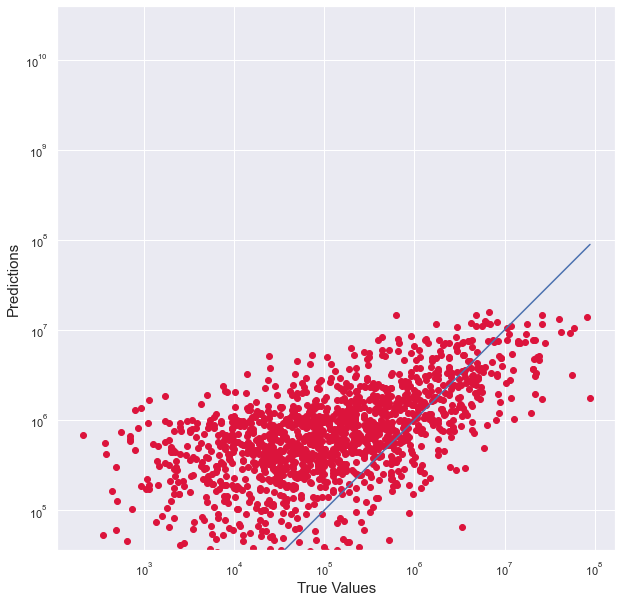

In [144]:
plt.figure(figsize=(10,10))
plt.scatter(price_test, price_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(price_pred), max(price_test))
p2 = min(min(price_pred), min(price_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Summary

In [145]:
X = df2[df2.columns.difference(['price'])]
Y = df2['price']
X = sm.add_constant(X) 
lm1 = sm.OLS(Y, X).fit()

In [146]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     14.13
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:21:41   Log-Likelihood:            -1.3644e+05
No. Observations:                8390   AIC:                         2.735e+05
Df Residuals:                    8100   BIC:                         2.755e+05
Df Model:                         289                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [147]:
pd.DataFrame({'Actual': price_test, 'Predicted': price_pred})

,Actual,Predicted
8622,27145,-1.118322e+05
1337,482500,9.151715e+05
5537,11244,-5.169128e+05
4698,1169500,5.088898e+05
2490,795000,1.880725e+06
...,...,...
1260,180407,-3.078148e+05
1100,1400000,1.887500e+06
2218,959400,1.506202e+05
6562,49564,9.735707e+05


In [148]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(price_test, price_pred))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(price_test, price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(price_test, price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(price_test, price_pred)))

Mean Absolute Error: 1135846.9574322551
Mean Absolute Percentage Error: 60.976094036634805
Mean Squared Error: 14880057392696.697
Root Mean Squared Error: 3857467.743571772


In [149]:
with open('summary_all.txt', 'w') as fh:
    fh.write(lm1.summary().as_text())